In [1]:
%load_ext autoreload
%autoreload

In [2]:
%matplotlib inline
from sgdr import *
from keras.optimizers import *
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
n=2000000

In [4]:
X = np.random.rand(n,15)
Y = np.random.randint(0,2,size=n)

In [5]:
bs=2000
nb=n/bs
nb

1000.0

- From 1e-5 to 1. in 1 epoch, 1000 batches
- 1e-5 * i * i ... 1000
- root(max/min, 1000)

In [6]:
start=1e-5
end=100.
ratio = end/start
step = ratio**(1/nb)
step

1.0162486928706955

In [7]:
inp = Input(shape=(15,))                
x = Dense(10, activation='relu')(inp)
x = Dense(1, activation='sigmoid')(x)

model = Model(inp, x)

cb = LR_Finder(lr_mult=step)
model.compile(optimizer=SGD(0.1), loss='binary_crossentropy', metrics=['accuracy'])

TypeError: __init__() got an unexpected keyword argument 'lr_mult'

In [ ]:
hist=model.fit(X, Y, batch_size=bs, epochs=1, callbacks=[cb], verbose=0)

In [ ]:
plt.plot(cb.history['iterations'], cb.history['lr'])
plt.yscale('log');

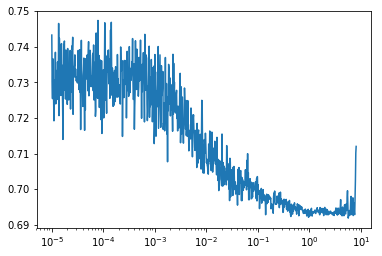

In [12]:
plt.plot(cb.history['lr'][:-15], cb.losses[:-15])
plt.xscale('log');

In [8]:
inp = Input(shape=(15,))                
x = Dense(10, activation='relu')(inp)
x = Dense(1, activation='sigmoid')(x)
model = Model(inp, x)
cb = CosAnneal(nb, 1, init_lr=1)
model.compile(optimizer=SGD(1e-5, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
hist=model.fit(X[:n//10], Y[:n//10], batch_size=bs, epochs=1)

Epoch 1/1
200000/200000 [==============================] - 1s - loss: 0.7048 - acc: 0.5021     


In [10]:
hist=model.fit(X, Y, batch_size=bs, epochs=2, callbacks=[cb])

Epoch 1/2
2000000/2000000 [==============================] - 6s - loss: 0.6934 - acc: 0.4999     
Epoch 2/2
2000000/2000000 [==============================] - 6s - loss: 0.6933 - acc: 0.5001     


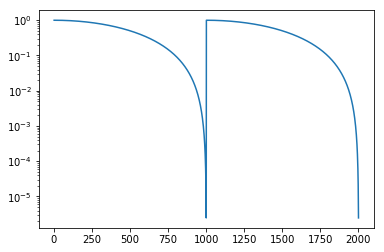

In [11]:
plt.plot(cb.history['iterations'], cb.history['lr'])
plt.yscale('log');

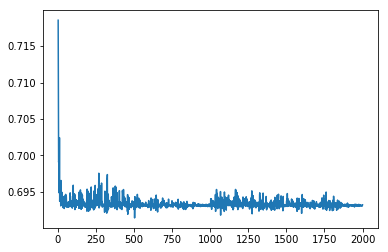

In [18]:
plt.plot(cb.history['iterations'], cb.losses)